# **Análisis de Evasión de Clientes Telecom X**

## **Extracción de Datos**

In [1]:
import requests
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

res = requests.get(url)
data = res.json()

df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df_telecomx = pd.json_normalize(data)
df_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Transformación**

### 1. Verificación de valores nulos por columna

In [4]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### 2. Verificación de datos únicos por columna

In [5]:
for col in df_telecomx.columns:
    print(f'{col}: {df_telecomx[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contrac

#### Transformación en Columna 'SeniorCitizen'

In [6]:
df_telecomx['customer.SeniorCitizen'] = df_telecomx['customer.SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
df_telecomx

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,No,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### 3. Verificación de valores nulos y vacíos

In [7]:
for col in df_telecomx.columns:
    print(f'Valores nulos en {col}: {df_telecomx[col].isnull().sum()}')

Valores nulos en customerID: 0
Valores nulos en Churn: 0
Valores nulos en customer.gender: 0
Valores nulos en customer.SeniorCitizen: 0
Valores nulos en customer.Partner: 0
Valores nulos en customer.Dependents: 0
Valores nulos en customer.tenure: 0
Valores nulos en phone.PhoneService: 0
Valores nulos en phone.MultipleLines: 0
Valores nulos en internet.InternetService: 0
Valores nulos en internet.OnlineSecurity: 0
Valores nulos en internet.OnlineBackup: 0
Valores nulos en internet.DeviceProtection: 0
Valores nulos en internet.TechSupport: 0
Valores nulos en internet.StreamingTV: 0
Valores nulos en internet.StreamingMovies: 0
Valores nulos en account.Contract: 0
Valores nulos en account.PaperlessBilling: 0
Valores nulos en account.PaymentMethod: 0
Valores nulos en account.Charges.Monthly: 0
Valores nulos en account.Charges.Total: 0


In [8]:
df_telecomx.apply(lambda x: x.astype(str).str.strip() == '').sum()


customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

#### Corrección de datos vacíos

In [9]:
df_telecomx['account.Charges.Total'] = pd.to_numeric(df_telecomx['account.Charges.Total'], errors = 'coerce')
print(df_telecomx['account.Charges.Total'].dtype)

float64


In [10]:
df_telecomx = df_telecomx[df_telecomx['Churn'].str.strip() != '']
print('Número de filas' ,len(df_telecomx))

Número de filas 7043


In [11]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   object 
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [12]:
df_telecomx = df_telecomx.dropna(subset = ['account.Charges.Total'])
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   object 
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

### 4. Cambiar nombre de columnas

In [13]:
df_telecomx.columns = ['id_cliente', 'evasion_cliente', 'genero', 'mayor_que_65', 'tiene_pareja', 'tiene_dependientes', 'meses_contrato', 'tiene_servicio_telefonico', 'tiene_multiples_lineas', 'tipo_internet', 'tiene_seguridad_online', 'tiene_respaldo_online', 'tiene_proteccion_adicional', 'tiene_soporte_tecnico', 'tiene_tv_streaming', 'tiene_peliculas_streaming', 'tipo_contrato', 'recibe_factura_online', 'metodo_pago', 'pago_mensual', 'pago_total']
df_telecomx.head()

,id_cliente,evasion_cliente,genero,mayor_que_65,tiene_pareja,tiene_dependientes,meses_contrato,tiene_servicio_telefonico,tiene_multiples_lineas,tipo_internet,...,tiene_respaldo_online,tiene_proteccion_adicional,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,recibe_factura_online,metodo_pago,pago_mensual,pago_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## 5. Creación de columna pago diario

In [14]:
df_telecomx['pago_diario'] = (df_telecomx['pago_mensual'] / 30).round(3)
df_telecomx.head()

,id_cliente,evasion_cliente,genero,mayor_que_65,tiene_pareja,tiene_dependientes,meses_contrato,tiene_servicio_telefonico,tiene_multiples_lineas,tipo_internet,...,tiene_proteccion_adicional,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,recibe_factura_online,metodo_pago,pago_mensual,pago_total,pago_diario
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.187
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.997
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.797


### 6. Traducción de información

In [15]:
df_telecomx['evasion_cliente'] = df_telecomx['evasion_cliente'].replace('Yes', 'Si')
df_telecomx['genero'] = df_telecomx['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_telecomx['tiene_pareja'] = df_telecomx['tiene_pareja'].replace('Yes', 'Si')
df_telecomx['tiene_dependientes'] = df_telecomx['tiene_dependientes'].replace('Yes', 'Si')
df_telecomx['tiene_servicio_telefonico'] = df_telecomx['tiene_servicio_telefonico'].replace('Yes', 'Si')
df_telecomx['tiene_multiples_lineas'] = df_telecomx['tiene_multiples_lineas'].replace({'Yes': 'Si', 'No phone service': 'No tiene servicio telefónico'})
df_telecomx['tipo_internet'] = df_telecomx['tipo_internet'].replace('Fiber optic', 'Fibra óptica')
df_telecomx['tiene_seguridad_online'] = df_telecomx['tiene_seguridad_online'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_respaldo_online'] = df_telecomx['tiene_respaldo_online'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_proteccion_adicional'] = df_telecomx['tiene_proteccion_adicional'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_soporte_tecnico'] = df_telecomx['tiene_soporte_tecnico'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_tv_streaming'] = df_telecomx['tiene_tv_streaming'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tiene_peliculas_streaming'] = df_telecomx['tiene_peliculas_streaming'].replace({'Yes': 'Si', 'No internet service': 'No tiene servicio de internet'})
df_telecomx['tipo_contrato'] = df_telecomx['tipo_contrato'].replace({'Month-to-month': 'Mes a mes', 'One year': 'Anual', 'Two year': 'Bianual'})
df_telecomx['recibe_factura_online'] = df_telecomx['recibe_factura_online'].replace('Yes', 'Si')
df_telecomx['metodo_pago'] = df_telecomx['metodo_pago'].replace({'Electronic check': 'Cheque electrónico', 'Mailed check': 'Cheque enviado por correo', 'Bank transfer (automatic)': 'Transferencia bancaria (automática)', 'Credit card (automatic)': 'Tarjeta de crédito (automática)'})

df_telecomx.head()

,id_cliente,evasion_cliente,genero,mayor_que_65,tiene_pareja,tiene_dependientes,meses_contrato,tiene_servicio_telefonico,tiene_multiples_lineas,tipo_internet,...,tiene_proteccion_adicional,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,recibe_factura_online,metodo_pago,pago_mensual,pago_total,pago_diario
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.6,593.30,2.187
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mes a mes,No,Cheque enviado por correo,59.9,542.40,1.997
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fibra óptica,...,Si,No,No,No,Mes a mes,Si,Cheque electrónico,73.9,280.85,2.463
3,0011-IGKFF,Si,Masculino,Yes,Si,No,13,Si,No,Fibra óptica,...,Si,No,Si,Si,Mes a mes,Si,Cheque electrónico,98.0,1237.85,3.267
4,0013-EXCHZ,Si,Femenino,Yes,Si,No,3,Si,No,Fibra óptica,...,No,Si,Si,No,Mes a mes,Si,Cheque enviado por correo,83.9,267.40,2.797


### 1. Análisis descriptivos

In [16]:
df_telecomx.describe()

,meses_contrato,pago_mensual,pago_total,pago_diario
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159944
std,24.545260,30.085974,2266.771362,1.002870
min,1.000000,18.250000,18.800000,0.608000
25%,9.000000,35.587500,401.450000,1.186500
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995500
max,72.000000,118.750000,8684.800000,3.958000


### 2. Distribución de la evasión

In [17]:
import matplotlib.pyplot as plt

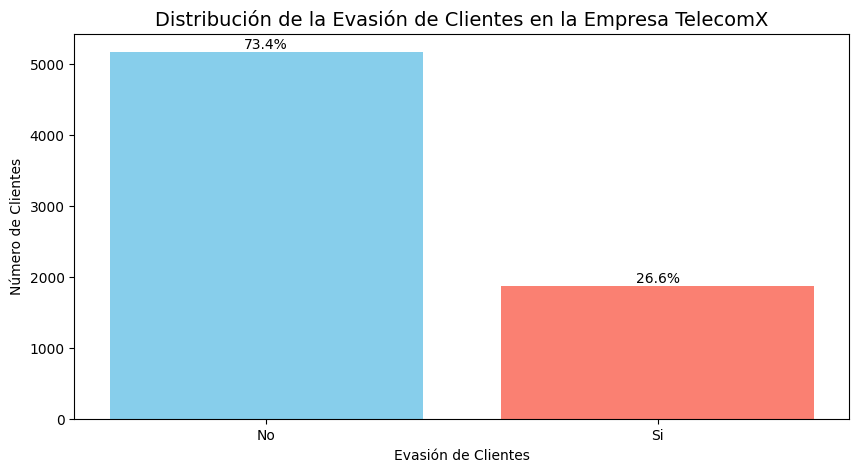

In [18]:
fig, ax = plt.subplots(figsize = (10,5))

cuenta_evasion = df_telecomx['evasion_cliente'].value_counts()
porcentaje_evasion = cuenta_evasion / len(df_telecomx) * 100

# df_telecomx['evasion_cliente'].value_counts().plot(kind = 'bar')

ax.bar(df_telecomx['evasion_cliente'].value_counts().index, df_telecomx['evasion_cliente'].value_counts().values, color = ['Skyblue', 'Salmon'])
ax.set_title('Distribución de la Evasión de Clientes en la Empresa TelecomX', fontsize = 14)
ax.set_xlabel('Evasión de Clientes')
ax.set_ylabel('Número de Clientes')
ax.xaxis.set_tick_params(rotation = 0)

for i, porcentaje in enumerate(porcentaje_evasion):
    ax.text(i, cuenta_evasion.iloc[i] + 50, f'{porcentaje:.1f}%', ha = 'center')

plt.show()

### 3. Evasión con respecto a variables categóriccas

In [19]:
import plotly.express as px

In [20]:
px.histogram(df_telecomx, x = 'genero', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [21]:
px.histogram(df_telecomx, x = 'mayor_que_65', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [22]:
px.histogram(df_telecomx, x = 'tiene_pareja', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [23]:
px.histogram(df_telecomx, x = 'tiene_dependientes', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [24]:
px.histogram(df_telecomx, x = 'tiene_servicio_telefonico', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [25]:
px.histogram(df_telecomx, x = 'tiene_multiples_lineas', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [26]:
px.histogram(df_telecomx, x = 'tipo_internet', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [27]:
px.histogram(df_telecomx, x = 'tiene_seguridad_online', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [28]:
px.histogram(df_telecomx, x = 'tipo_contrato', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [29]:
px.histogram(df_telecomx, x = 'recibe_factura_online', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [30]:
px.histogram(df_telecomx, x = 'metodo_pago', color = 'evasion_cliente', barmode = 'group', text_auto = True)

### 4. Evasión con respecto a variables numéricas

In [31]:
px.histogram(df_telecomx, x = 'meses_contrato', color = 'evasion_cliente', barmode = 'group', text_auto = True)

In [32]:
px.histogram(df_telecomx, x = 'pago_total', color = 'evasion_cliente', barmode = 'group', text_auto = True)

## **Informe Final**

### **1- Introducción**
La evasión de clientes, comunmente conocida como "Churn", representa uno de los mayores retos estratégicos para las empresas de telecomunicaciones. Debido a la alta competitividad del sector, los clientes tienen múltiples opciones y pueden cambiar de proovedor con relativa facilidad, lo que impacta directamente en los ingresos y la estabilidad del negocio.
    
Telecom X enfrenta actualmente una tasa elevada de cancelaciones, lo que genera la necesidad de comprender qué características y comportamientos están asociados a la pérdida de clientes. En este contexto, el análisis de datos se convierte en una herramienta clave para identificar patrones ocultos, anticipar riesgos y diseñar estrategias de retención más efectivas.

El objetivo principal de este proyecto es analizar los datos de clientes de Telecom X, para poder identificar los factores que influyan en la evasión, y de la misma manera generar información que sirva como base para la toma de decisiones de negocio orientadas a la retención de clientes.

### **2- Limmpieza y Tratamiento de Datos**
Para poder realizar los análisis, los datos se pasaron pro un procesión de extracción, transformación y carga, en dónde se llevó a cabo lo siguiente:

#### Extracción de datos
Los datos fueron obtenidos a través de una API, utilizando la biblioteca "requests" para realizar la solicitud de acceso a los datos de los clientes. Posteriormente estos fueron convertidos a un DataFrame de "pandas", permitiendo una manipulación eficiente y estructurada. 
    
Cabe destacar que, debido a que los datos presentaban datos apilados en forma de diccionario, se normalizó estos datos utilizando el método "json_normalize" para poder extraer correctamente toda la información.

#### Transformación y limpieza
Durante esta fase se realizaron múltiples tareas para garantizar la consistencia y confiabilidad del dataset:

- Revisión de valores nulos dentro del DataFrame utilizando el método ".info()", obteniendo que se presentaban un total de 7267 valores, sin ningún valor nulo, y observando que la columna de total era de tipo Object, indicando que estos datos estaban en formato string.
- Revisión de valores únicos por columna, dónde se pudo observar que la columna "Churn" presentaba datos vacíos.
- Conversión de la columna de total a formato numérico utilizando el método ".to_numeric()" y pasando el parámetro "errors = coerce", para que realizara un parseo de string a tipo numérico, convirtiendo automáticamente los valores vacíos en valores nulos, los cuales fueron eliminados posteriormente.
- En cuanto a los valores vacíos de la columna "Churn", se decidió eliminarlos directamente utilizando el método ".strip()", con esto se quedó con un total de 7043 datos ingresados en el DataFrame.
- Cambio del nombre de las columnas para un mejor entendimiento, traduciendolas al español y volviendo los nombres más descriptivos.
- Estandarización de variables categóricas, traduciendo los valores al español.
- Creación de la columna "gastos_diarios" dividiendo el pago mensual entre 30.

### **3- Anállisis Exploratorio de Datos**
El análisis exploratorio de datos (EDA) se realizó con el objetivo de identificar patrones, tendencias y posibles relaciones entre las características de los clientes y la evasión del servicio (churn). Esta etapa resulta fundamental para comprender el comportamiento de los usuarios y sentar las bases para análisis más profundos posteriormente.

3.1- **Distribución de la evasión de clientes**

En primer lugar, se analizó la distribución general de la variable evasión de clientes (Churn). Como se observa en la siguiente figura, el 26.6% de los clientes ha cancelado el servicio, mientras que el 73.4% permanece activo dentro de la empresa.

Este resultado evidencia que, aunque la mayoría de los clientes continúan utilizando los servicios de Telecom X, existe una proporción significativa de usuarios que abandonan la compañía. En términos de negocio, una tasa de evasión cercana al 27% representa un riesgo importante para la estabilidad financiera, ya que la captación de nuevos clientes suele implicar mayores costos que la retención de los actuales.

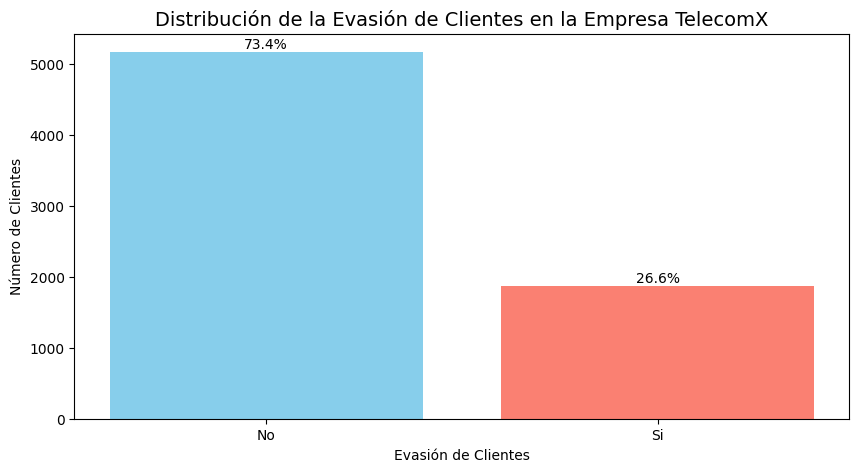

3.2 Evasión de clientes y variables categóricas

Posterirmente, se analizó la evasión de clientes en función de distintas variables categóricas, con el fin de identificar características que podrían estar asociadas a una mayor probabilidad de cancelación del servicio.
De este análisis se identificaron diferencias relevantes en las siguientes variables: 





- **Evasión de clientes según la posesión de servicios telefónicos**

El gráfico muestra una relación marcada entre la posesión del servicio telefónico y la tasa de evasión de clientes. Los clientes que sí poseen el servicio telefónico presentan una base considerablemente mayor, con 4.653 clientes activos, pero también registran un número elevado de cancelaciones: 1.699 casos de evasión. Esto indica que, aunque la gran mayoría de los clientes telefónicos se mantienen leales, existe un segmento significativo que decide abandonar el servicio, posiblemente debido a factores como insatisfacción con la calidad, el costo, la atención al cliente o la percepción de valor en comparación con alternativas del mercado.

Por otro lado, los clientes que no tienen servicio telefónico muestran una evasión notablemente menor, con solo 170 cancelaciones, y una base de 510 clientes activos. Esta baja tasa de abandono sugiere que los clientes sin teléfono tienden a ser más estables, quizás porque su compromiso con la empresa está centrado en otros servicios (como internet o televisión) y no están expuestos a los posibles problemas asociados al servicio telefónico.

In [33]:
px.histogram(df_telecomx, x = 'tiene_servicio_telefonico', color = 'evasion_cliente', barmode = 'group', text_auto = True, title = 'Evasión de Clientes de la Empresa Telecom X Según la Posesión del Servicio Telefónico', labels = {'tiene_servicio_telefonico': '¿Tiene Servicio Telefónico?', 'evasion_cliente': 'Evasión de Clientes'})

- **Evasión de clientes según el tipo de internet contratado**

La siguiente figura muestra la distribución de la evasión de los clientes en función del tipo de servicio de internet contratado. Se observa que los clientes con servicio de fibra óptica presentan el mayor número absoluto de cancelaciones, con 1,297 clientes que abandonaron la empresa, en comparación con 1,799 que permanecen activos. Esta situación sugiere que, aunque la fibra óptica es un servicio tecnológicamente superior, existe una proporción considerable de clientes insatisfechos o sensibles a factores como el costo, la calidad percibida o la atención al cliente.

En el caso del servicio DSL, se registran 459 clientes que evadieron frente a 1,957 que no lo hicieron, lo que indica una menor tasa relativa de evasión en comparación con la fibra óptica. Esto podría estar relacionado con expectativas más bajas del servicio o con una mayor estabilidad en el perfil de los usuarios que optan por este tipo de conexión.

Por otro lado, los clientes que no cuentan con servicio de internet presentan la menor cantidad de evasión (113), lo cual puede explicarse por el hecho de que estos usuarios suelen contratar servicios básicos, posiblemente con menores costos y menor exposición a problemas técnicos asociados al servicio de internet.

In [34]:
px.histogram(df_telecomx, x = 'tipo_internet', color = 'evasion_cliente', barmode = 'group', text_auto = True, title = 'Evasión de Clientes de la Empresa Telecom X según el Tipo de Internet Contratado', labels = {'tipo_internet': 'Tipo de Internet', 'evasion_cliente': 'Evasión de Clientes'})

- **Evasión de clientes según el tipo de contrato**

En cuanto a la evasión de clientes según el tipo de contrato, como se puede evidenciar en la siguiente figura. Existe una diferencia marcada entre los distintos tipos de contrato, lo que indica que esta variable podría ser un factor determinante en la permanecia de los clientes.

Los clientes con contrato mes a mes presentan la mayor cantidad de evasiones, con 1,655 clientes que cancelaron el servicio, frente a 2,220 que permanecen activos. Este comportamiento es consistente con la naturaleza flexible de este tipo de contrato, el cual facilita la decisión de abandonar la empresa al no existir un compromiso a largo plazo.

En contraste, los contratos anuales y bianuales muestran niveles significativamente más bajos de evasión. En el caso de los contratos anuales, únicamente 166 clientes abandonaron el servicio, mientras que en los contratos bianuales la evasión es mínima, con tan solo 48 clientes. Estos resultados indican que los contratos de mayor duración actúan como un mecanismo efectivo de retención, reduciendo considerablemente la probalididad de "churn"

In [35]:
px.histogram(df_telecomx, x = 'tipo_contrato', color = 'evasion_cliente', barmode = 'group', text_auto = True, title = 'Evasión de Clientes de la Empresa Telecom X según el Tipo de Contrato', labels = {'tipo_contrato': 'Tipo de Contrato', 'evasion_cliente': 'Evasión de Clientes'})

- **Evasión de clientes según el método de pago**

El gráfico muestra la distribución de la evasión de clientes según el método de pago utilizado, revelando diferencias significativas entre las modalidades analizadas. El método de "Cheque electrónico" presenta la mayor cantidad absoluta de cancelaciones, con 1.071 clientes evadidos, aunque también mantiene una base sólida de clientes retenidos con 1.294 activos. Esto sugiere que, a pesar de ser una opción digital, puede generar fricciones en la experiencia de pago que afectan la permanencia de un segmento importante de usuarios.

En contraste, los métodos de pago plenamente automatizados muestran una retención notablemente superior. La transferencia bancaria automática registra 1.284 clientes activos frente a solo 258 evadidos, y la tarjeta de crédito automática cuenta con 1.289 activos contra 232 cancelaciones. Estos datos destacan la eficacia de los procesos automatizados para fomentar la lealtad del cliente.

Por su parte, el "Cheque enviado por correo" presenta una situación intermedia, con 1.296 clientes activos y 308 evadidos, lo que indica que, aunque este método manual mantiene a una mayoría de clientes, aún presenta una tasa de evasión relevante en comparación con los sistemas automatizados.

In [36]:
px.histogram(df_telecomx, x = 'metodo_pago', color = 'evasion_cliente', barmode = 'group', text_auto = True, title = 'Evasión de Clientes de la Empresa Telecom X según el Método de Pago', labels = {'metodo_pago': 'Método de Pago', 'evasion_cliente': 'Evasión de Clientes'})

3.3- **Evasión de clientes y variables numéricas**

En el caso de la evasión con respecto a las variables numéricas se obtuvo lo siguiente:

- **Evasión de clientes según los meses de contrato**

El gráfico muestra que la evasión de clientes se concentra significativamente durante los primeros meses del contrato, lo que sugiere un patrón de abandono temprano vinculado a la experiencia inicial con el servicio. En el primer mes se registra la mayor cantidad de cancelaciones, con 380 clientes que decidieron retirarse de la empresa. Este pico inicial podría estar asociado a una desconexión entre las expectativas generadas durante la venta y la realidad del servicio recibido, fallas técnicas en la instalación, dificultades en la atención al cliente o inconvenientes en el proceso de activación

La evasión continúa siendo considerable entre el segundo y tercer mes, con 217 cancelaciones, lo que indica que un segmento de clientes permanece en un período de evaluación antes de tomar la decisión de abandonar. Finalmente, entre el cuarto y quinto mes se observa una reducción en el número de bajas, con 147 casos, lo que podría reflejar una mayor estabilización de la relación con aquellos clientes que superan la fase crítica inicial.

In [37]:
px.histogram(df_telecomx, x = 'meses_contrato', color = 'evasion_cliente', barmode = 'group', text_auto = True, title = 'Evasión de Clientes de la Empresa Telecom X según los Meses de Contrato', labels = {'meses_contrato': 'Meses de Contrato', 'evasion_cliente': 'Evasión de Clientes'})

- **Evasión de clientes y pago total realizado**

El gráfico muestra una relación clara entre el monto total pagado por el cliente y su propensión a abandonar el servicio. Se observa que la evasión se concentra mayoritariamente en el segmento de menor gasto: 574 clientes que cancelaron pagaron entre 0 y 200 unidades monetarias, seguido por 189 cancelaciones en el rango de 200 a 400. Esta tendencia indica que los clientes con inversión baja presentan una menor lealtad y son más propensos a abandonar el servicio, posiblemente por percepciones de bajo valor, sensibilidad al precio o por tratarse de usuarios en etapas iniciales de contratación.

Por otro lado, la evasión disminuye progresivamente a medida que aumenta el pago total realizado, lo que sugiere que los clientes con mayor inversión económica tienden a mantenerse más comprometidos con la empresa. Esta relación podría reflejar una mayor satisfacción, una percepción de valor más sólida o una dependencia funcional del servicio adquirido.

En cuanto a los clientes activos, también se observa una concentración en los rangos bajos de pago: 607 activos en el rango de 0 a 200, 384 entre 200 y 400, y 328 entre 400 y 600. 

In [38]:
px.histogram(df_telecomx, x = 'pago_total', color = 'evasion_cliente', barmode = 'group', text_auto = True, title = 'Evasión de Clientes de la Empresa Telecom X según el Pago Total Realizado', labels = {'pago_total': 'Pago Total Realizado', 'evasion_cliente': 'Evasión de Clientes'})

### **4- Conclusiones**

El análisis integral de los factores que influyen en la evasión de clientes de Telecom X ha permitido identificar patrones claros y segmentos de riesgo, destacando los siguientes hallazgos principales:

1. La evasión es temprana: La mayor concentración de cancelaciones ocurre en el primer mes de contrato (380 casos), seguido de una disminución progresiva en los meses siguientes. Esto indica que la experiencia inicial del cliente es crítica para la retención.

2. El método de pago parece influir significativamente en la permanencia: Los métodos manuales o semiautomáticos (cheque electrónico) están asociados con mayor evasión, mientras que los sistemas completamente automatizados muestran una retención muy superior.

3. El tipo de servicio contratado afecta la retención: Los clientes con fibra óptica presentan la mayor cantidad absoluta de cancelaciones, a pesar de ser un servicio de gama alta, lo que sugiere posibles deficiencias en la calidad percibida, el soporte o la relación precio-valor.

4. El monto total pagao es un indicador de compromiso: Los clientes con menor gasto (0-200 unidades monetarias) son los más propensos a abandonar.

5. La posesión de servicios adicionales influye en la estabilidad: Los clientes sin servicio telefónico presentan una menor tasa de evasión, mientras que quienes poseen este servicio muestran una mayor propensión al abandono.

### **5- Recomendaciones**

1. Fortalecer la experiencia inicial del cliente estableciendo un protocolo de retención temprana para clientes en riesgo durante los primeros tres meses, con ofertas de valor, ajustes de servicio o incentivos de fidelización.

2. Simplificar el proceso de registro en métodos digitales y automatizados, con guías paso a paso, asistencia en línea y recordatorios automatizados.

3. Diseñar paquetes personalizados que incluyan garantías de servicio o beneficios agregados para mejorar la percepción de valor de los servicios de fibra óptica.

4. Realizar un estudio de satisfacción enfocado en usuarios de fibra óptica para identificar puntos críticos (velocidad, estabilidad, atención al cliente, precio)

5. Desarrollar programas de lealtad diferenciados para clientes de bajo gasto, con ofertas de upgrade controlado o contenidos de valor educativo sobre el uso del servicio.

6. Utilizar modelos predictivos que combinen variables como tipo de servicio, método de pago, meses de antigüedad y nivel de gasto para identificar clientes en riesgo de cancelación.